# Wstęp do Sztucznej Inteligencji - rok akademicki 2021/2022

Przed rozpoczęciem pracy z notatnikiem zmień jego nazwę zgodnie z wzorem: `NrAlbumu_Nazwisko_Imie_PoprzedniaNazwa`.

Przed wysłaniem notatnika upewnij się, że rozwiązałeś wszystkie zadania/ćwiczenia.

# Temat:  Wnioskowanie oparte na wiedzy niepewnej. Wnioskowanie rozmyte
Zapoznaj się z treścią niniejszego notatnika czytając i wykonując go komórka po komórce. Wykonaj napotkane zadania/ćwiczenia.

Na niniejszych laboratoriach będziemy wykorzystywać bibliotekę `fuzzython`(https://github.com/yudivian/fuzzython). Orginalny moduł zawierał kilka błędów przez co nie dało się go zainstalować za pomocą `pip`. Aby móc z niego zkorzystać należy pobrać zmodyfikowany moduł `fuzzython.zip` (plik dostępny na delcie), rozpakować go i wrzucić na dysk google, a następnie wykonać poniższą komórkę montującą dysk google:


In [170]:
import zipfile
with zipfile.ZipFile('fuzzython.zip','r') as zip_ref:
    zip_ref.extractall('.')

Przy importowaniu elementów z modułu `fuzzython` używamy konstrukcji:
```python
from fuzzython.nazwa_podmodulu import jakies, funkcje, klasy, itp.
```

## Zadanie 1 (obowiązkowe, 5pkt)
Zaprojektuj system rozmyty typu Mamdani, który będzie oceniał stopień przekonania o możliwości spowodowania wypadku podczas jazdy samochodem.

Zmienne wejściowe: 

- prędkość jazdy (10 − 200km/h ): `mała`, `średnia`, `szybka`, `bardzo szybka` 
- widoczność (0.05 − 4km): `bardzo słaba`, `średnia`, `dobra`. 

Wyjście systemu: 

- stopień przekonania o możliwości spowodowania wypadku (0 − 1): `bardzo małe`, `małe`, `średnie`, `duże`.

Zdefiniuj własne kształty dla zbiorów rozmytych, stwórz własne reguły oraz przygotuj wykresy ilustrujące funkcje przynależności zbiorów rozmytych jak również powierzchnię decyzyjną sterownika rozmytego.

### TWÓJ PROGRAM:

In [171]:
import numpy as np
import matplotlib.pyplot as p
from fuzzython.fsets.gaussian import Gaussian
from fuzzython.fsets.zfunction import ZFunction
from fuzzython.fsets.sfunction import SFunction
from fuzzython.fsets.triangular import Triangular
from fuzzython.fsets.trapezoid import Trapezoid
from fuzzython.variable import Variable
from fuzzython.adjective import Adjective
from fuzzython.ruleblock import RuleBlock
from fuzzython.systems.mamdani import MamdaniSystem
from fuzzython.systems.sugeno import SugenoSystem
from mpl_toolkits.mplot3d import Axes3D

In [172]:
def plotFuzzySet(ax, fuzzySet, x, *args, **kwargs):
    y = np.array([fuzzySet(n) for n in x])
    ax.plot(x, y, *args, **kwargs)
    ax.set_ylim(-0.05, 1.05)
    ax.legend()

In [173]:
speedLow = ZFunction((10,0), 25.0, (40,1))
speedMedium = Gaussian(60.0, 20.0)
speedHigh = Triangular((80,0), (110,1), (160,0))
speedVeryHigh = SFunction((125,0), 160., (200,1))

aSpeedLow = Adjective('speedLow', speedLow)
aSpeedMedium = Adjective('speedMedium', speedMedium)
aSpeedHigh = Adjective('speedHigh', speedHigh)
aSpeedVeryHigh = Adjective('speedVeryHigh', speedVeryHigh)

speed = Variable('speed', 'km/h', aSpeedLow, aSpeedMedium, aSpeedHigh, aSpeedVeryHigh)

In [174]:
visibilityLow = ZFunction((0.5,0), 1.0, (1.5,1))
visibilityMedium = Triangular((0.5,0), (2.0,1), (4.0,0))
visibilityGood = SFunction((3,0), 3.5, (4.0,1))

aVisibilityLow = Adjective('visibilityLow', visibilityLow)
aVisibilityMedium = Adjective('visibilityMedium', visibilityMedium)
aVisibilityGood = Adjective('visibilityGood', visibilityGood)

visibility = Variable('visivility', 'km', aVisibilityLow, aVisibilityMedium, aVisibilityHigh)

In [175]:
accidentVeryLow = ZFunction((0,0), 0.2, (0.4,1))
accidentLow = Triangular((0.2,0), (0.4,1), (0.5,0))
accidentMedium = Triangular((0.5,0), (0.7,1), (0.8,0))
accidentHigh = SFunction((0.7,0), 0.9, (0.85,1))

aAccidentVeryLow = Adjective('accidentVeryLow', accidentVeryLow)
aAccidentLow = Adjective('accidentLow', accidentLow)
aAccidentMedium = Adjective('accidentMedium', accidentMedium)
aAccidentHigh = Adjective('accidentHigh', accidentHigh)

accident = Variable('accident', 'chance', aAccidentVeryLow, aAccidentLow, aAccidentMedium, aAccidentHigh)

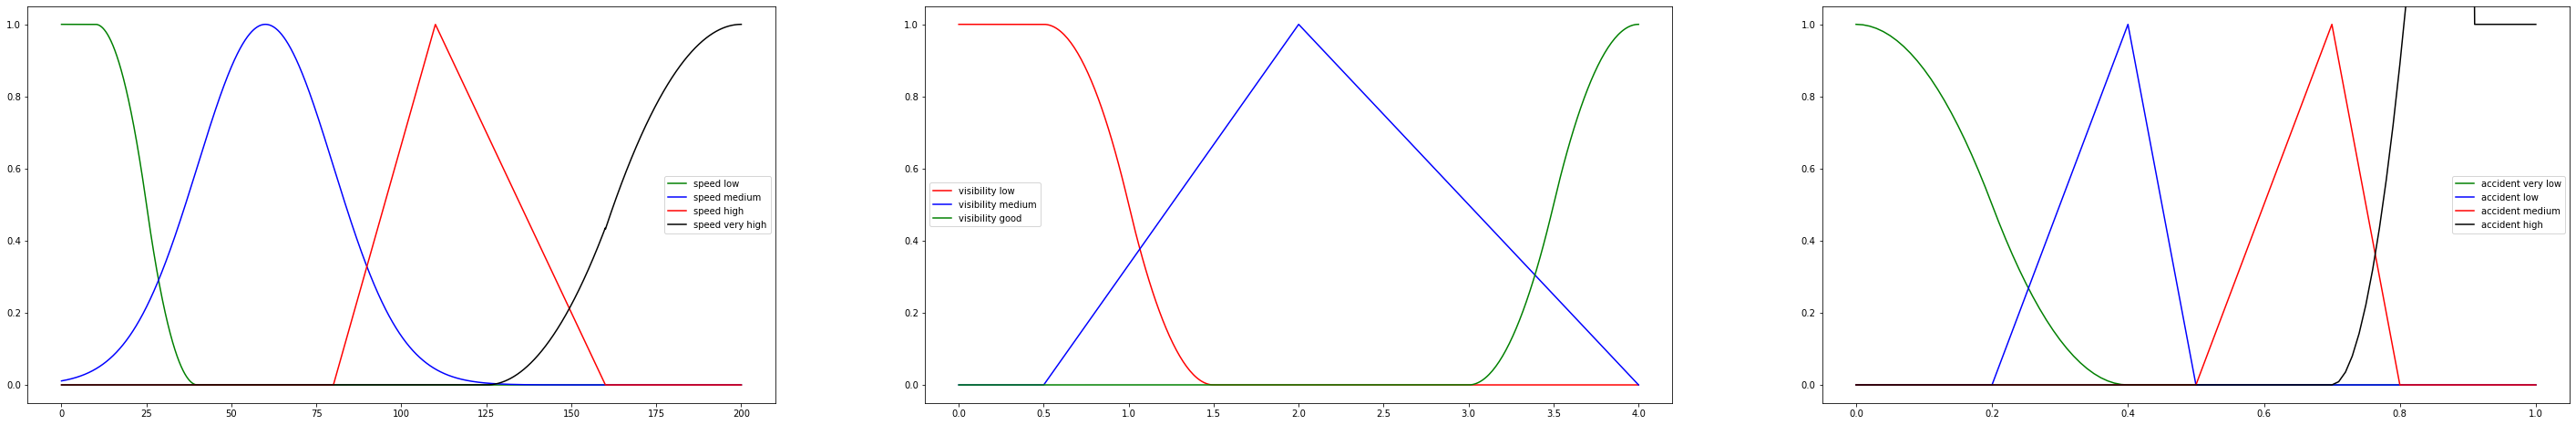

In [176]:
x1 = np.round(np.linspace(0,200,5000),2)
x2 = np.round(np.linspace(0,4,5000),2)
x3 = np.round(np.linspace(0,1,5000),2)
fig, ax = p.subplots(nrows = 1, ncols = 3, figsize = (50, 8))
((ax1, ax2, ax3)) = ax

plotFuzzySet(ax1, speedLow, x1, 'green', label = 'speed low')
plotFuzzySet(ax1, speedMedium, x1, 'blue', label = 'speed medium')
plotFuzzySet(ax1, speedHigh, x1, 'red', label = 'speed high')
plotFuzzySet(ax1, speedVeryHigh, x1, 'black', label = 'speed very high')

plotFuzzySet(ax2, visibilityLow, x2, 'red', label = 'visibility low')
plotFuzzySet(ax2, visibilityMedium, x2, 'blue', label = 'visibility medium')
plotFuzzySet(ax2, visibilityGood, x2, 'green', label = 'visibility good')

plotFuzzySet(ax3, accidentVeryLow, x3, 'green', label = 'accident very low')
plotFuzzySet(ax3, accidentLow, x3, 'blue', label = 'accident low')
plotFuzzySet(ax3, accidentMedium, x3, 'red', label = 'accident medium')
plotFuzzySet(ax3, accidentHigh, x3, 'black', label = 'accident high')

In [177]:
scope = locals()

rule1 = 'if speed is aSpeedLow and visibility is aVisibilityGood then accident is aAccidentVeryLow'
rule2 = 'if speed is aSpeedMedium and visibility is aVisibilityGood then accident is aAccidentLow'
rule3 = 'if speed is aSpeedMedium and visibility is aVisibilityMedium then accident is aAccidentMedium'
rule4 = 'if speed is aSpeedVeryHigh or visibility is aVisibilityLow then accident is aAccidentHigh'

In [180]:
block = RuleBlock('rb_mamdani', operators=('MIN','MAX','ZADEH'), activation='MIN', accumulation='MAX')
block.add_rules(rule1, rule2, rule3, rule4, scope=scope)

In [183]:
inputs = {'speed': 40, 'visibility': 3} #tak naprawdę to można podać liczby rzeczywiste od 0 do 10
#result = mamdani.compute(inputs) tutaj wyrzuca błąd nie wiem jak go naprawić
#print(result)

not used input: visibility


TypeError: '<=' not supported between instances of 'NoneType' and 'int'


## Zadanie 2 (obowiązkowe, 5pkt)
Zaprojektuj system rozmyty typu Takagi-Sugeno, który będzie prognozował cenę akcji na jeden dzień do przodu.

Zmienne wejściowe: 

- cena akcji wczoraj (1 − 20zł): `niska`, `średnia`, `wysoka`, 

- cena akcji dziś (1 − 20zł): `niska`, `średnia`, `wysoka`. 

Wyjście systemu: 

- cena akcji jutro dana równaniem regresji: $\alpha\cdot x + \beta\cdot y + \gamma$

Reguły postaci:

- Jeśli cena akcji wczoraj była $A_i$ i cena akcji dziś jest $B_i$ to cena akcji jutro będzie $\alpha_k\cdot x + \beta_k\cdot y + \gamma_k$,

gdzie:

- $x$ to cena akcji wczoraj (ostra wartość)

- $y$ to cena akcji dziś (ostra wartość)

- $A_i, B_i$ to zbiory rozmyte odpowiednio dla ceny akcji wczoraj i dziś

- $\alpha_k, \beta_k, \gamma_k$ - współczynniki w równaniu regresji (liczby rzeczywiste)

- $k$ - numer reguły

Zdefiniuj własne kształty dla zbiorów rozmytych, stwórz własne reguły (dobór współczynników regresji) oraz przygotuj wykresy ilustrujące funkcje przynależności zbiorów rozmytych jak również powierzchnię decyzyjną sterownika rozmytego.

### TWÓJ PROGRAM:

In [161]:
yesterdayLow = Gaussian(3.2, 2.7)
yesterdayMedium = Gaussian(11.3, 3.1)
yesterdayHigh = Gaussian(17.8, 3.2)

aYesterdayLow = Adjective('aYesterdayLow', yesterdayLow)
aYesterdayMedium = Adjective('aYesterdayMedium', yesterdayMedium)
aYesterdayHigh = Adjective('aYesterdayHigh', yesterdayHigh)

yesterday = Variable('yesterday', 'zloty', aYesterdayLow, aYesterdayMedium, aYesterdayHigh)

In [163]:
todayLow = Gaussian(3.2, 2.7)
todayMedium = Gaussian(11.3, 3.1)
todayHigh = Gaussian(17.8, 3.2)

aTodayLow = Adjective('aTodayLow', todayLow)
aTodayMedium = Adjective('aTodayMedium', todayMedium)
aTodayHigh = Adjective('aTodayHigh', todayHigh)

today = Variable('today', 'zloty', aTodayLow, aTodayMedium, aTodayHigh)

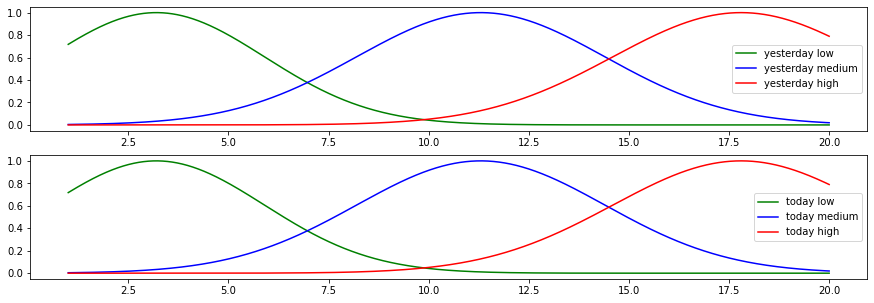

In [164]:
x = np.round(np.linspace(1,20,5000),2)
fig, axs = p.subplots(nrows=2, ncols=1, figsize=(15,5))
((ax1,ax2)) = axs

plotFuzzySet(ax1, yesterdayLow, x, 'green', label = 'yesterday low')
plotFuzzySet(ax1, yesterdayMedium, x, 'blue', label = 'yesterday medium')
plotFuzzySet(ax1, yesterdayHigh, x, 'red', label = 'yesterday high')

plotFuzzySet(ax2, todayLow, x, 'green', label = 'today low')
plotFuzzySet(ax2, todayMedium, x, 'blue', label = 'today medium')
plotFuzzySet(ax2, todayHigh, x, 'red', label = 'today high')

In [165]:
rule5 = 'if yesterday is aYesterdayLow and today is aTodayLow then z=0.8*yesterday-0.1*today'
rule6 = 'if yesterday is aYesterdayMedium and today is aTodayMedium then z=0.0*yesterday+1.0*today+0.4'
rule7 = 'if yesterday is aYesterdayHigh and today is aTodayHigh then z=0.6*yesterday+0.6*today+1.5'

block = RuleBlock('rb_takagi', operators=('MIN', 'MAX', 'ZADEH'), activation='MIN', accumulation='MAX')
block.add_rules(rule5, rule6, rule7, scope=scope)

In [166]:
sugeno = SugenoSystem('model_takagi', block)

In [184]:
inputs = {'yesterday': 8, 'today': 10}
result = sugeno.compute(inputs)
print(result)

{'rb_takagi': 10.089217864378016}


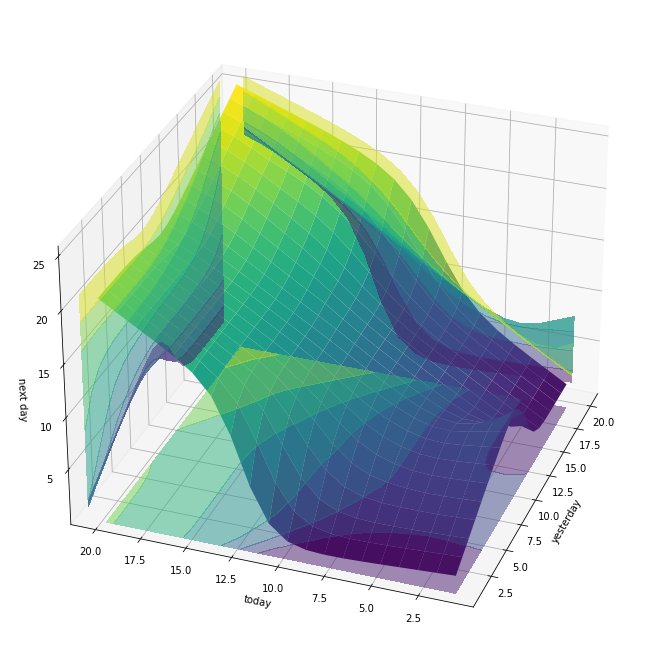

In [185]:
x = np.linspace(1, 20, 20)
x, y = np.meshgrid(x, x)
z = np.zeros((len(x),len(x)))

for i in range(len(x)):
    for j in range(len(x)):
        inputs = {'yesterday': x[i, j], 'today': y[i, j]}
        res = sugeno.compute(inputs)
        z[i, j] = res['rb_takagi']
            
fig = p.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap='viridis', linewidth=0.4, antialiased=True)
cset = ax.contourf(x, y, z, zdir='z', offset= -1, cmap='viridis', alpha=0.5)
cset = ax.contourf(x, y, z, zdir='x', offset= 21, cmap='viridis', alpha=0.5)
cset = ax.contourf(x, y, z, zdir='y', offset= 21, cmap='viridis', alpha=0.5)
ax.set_xlabel('yesterday')
ax.set_ylabel('today')
ax.set_zlabel('next day')
ax.view_init(30, 200)

&copy; Katedra Informatyki, Politechnika Krakowska